# Homework11: Time Series Analysis

**1.	What scale of measurement applies to timeseries data? Is timeseries data continuous or discrete? Why?**

**Answer:** Continuous numerical data applies to time series analyses. Time series data is continuous because one could technically slice the data infinitely. Even if visualizing or grouping data by years, months, quarters, etc. there are infinite ways to slice time. Discrete variables are more 'countable' such as the number of books on your bookshelf.

**2.	What does ARIMA stand for? Break down and explain each piece in the name.**

**Answer:** ARIMA stands for "Autoregressive Integrated Moving Average." 

*Autoregressive* means that the predictive variable is regressed on itself (its own prior values) in order to predict an outcome.

*Integrated* means that the values in the model represent a difference. Specifically, the difference between the current value and the previous value. 

*Moving Averages* represent an average that is dynamically and reflexively changing based on prior data points. For example, the 7-day 'moving average' on December 1, 2021 will be calculated based on data 7 days prior to that date. The 7-day 'moving average' on December 10th, 2021 will be calculated based on data 7 days prior to *that* date.

In sum, an ARIMA model can be used to forecast time series data. We can use trends in a variable of interest to predict the outcome of that variable. 

**3.	Using the data in the temperatures/ folder. Write a function that efficiently converts every column to a different temperature scale: one that is more common than Kelvin.**

In [82]:
# Load necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data file
temp = pd.read_csv('temperature.csv')

# Inspect the data
temp_df = pd.DataFrame(temp)
temp_df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,10/1/2012 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,10/1/2012 13:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,10/1/2012 14:00,284.629041,282.083252,289.474993,281.797217,291.868185,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,10/1/2012 15:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847789,287.231672,307.391513,304.281841,310.411539,304.4,304.4,303.5
4,10/1/2012 16:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


**Troubleshoot**

In [83]:
# Create a function that converts Kelvin into Fahrenheit
def Fahrenheit(K):
    # Formular for Fahrenheit
    F = ((K - 273.15)*(9/5))+32
    return F

In [84]:
# Create an empty list to append city names to
city_list = []

# Iterate through columns in data frame and append the city name to the list
for col in temp_df.columns:
    if col != 'datetime':
        city_list.append(col)

# print list to confirm
print(city_list)

['Vancouver', 'Portland', 'San Francisco', 'Seattle', 'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque', 'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City', 'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis', 'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami', 'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal', 'Boston', 'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa', 'Nahariyya', 'Jerusalem']


In [85]:
# Call every column name (from city_list)
# Apply the function we just made to every single column
temp_df[city_list] = temp_df[city_list].apply(Fahrenheit)

# Print first few rows to confirm it worked
temp_df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,10/1/2012 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.710000,NaN,NaN,NaN
1,10/1/2012 13:00,52.664000,48.074000,61.394000,47.570000,65.696000,65.084000,68.468000,74.210000,53.546000,...,54.464000,59.126000,54.824000,57.236000,93.992000,90.176000,99.374000,88.25,88.25,86.63
2,10/1/2012 14:00,52.662274,48.079854,61.384987,47.564990,65.692734,65.090302,68.455654,74.225315,53.608205,...,54.523774,59.175817,54.832370,57.264966,93.992000,88.088000,99.222385,88.25,88.25,86.63
3,10/1/2012 15:00,52.658596,48.095360,61.359113,47.551699,65.683120,65.108039,68.435919,74.266677,53.751113,...,54.692283,59.318491,54.856021,57.347009,93.634723,88.037314,99.070769,88.25,88.25,86.63
4,10/1/2012 16:00,52.654918,48.110866,61.333238,47.538407,65.673506,65.125777,68.416183,74.308039,53.894021,...,54.860793,59.461166,54.879672,57.429052,93.191359,87.958426,98.919154,88.25,88.25,86.63


In [86]:
# Reassign data frame to new variable
temp_df_F = temp_df
temp_df_F.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,10/1/2012 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.710000,NaN,NaN,NaN
1,10/1/2012 13:00,52.664000,48.074000,61.394000,47.570000,65.696000,65.084000,68.468000,74.210000,53.546000,...,54.464000,59.126000,54.824000,57.236000,93.992000,90.176000,99.374000,88.25,88.25,86.63
2,10/1/2012 14:00,52.662274,48.079854,61.384987,47.564990,65.692734,65.090302,68.455654,74.225315,53.608205,...,54.523774,59.175817,54.832370,57.264966,93.992000,88.088000,99.222385,88.25,88.25,86.63
3,10/1/2012 15:00,52.658596,48.095360,61.359113,47.551699,65.683120,65.108039,68.435919,74.266677,53.751113,...,54.692283,59.318491,54.856021,57.347009,93.634723,88.037314,99.070769,88.25,88.25,86.63
4,10/1/2012 16:00,52.654918,48.110866,61.333238,47.538407,65.673506,65.125777,68.416183,74.308039,53.894021,...,54.860793,59.461166,54.879672,57.429052,93.191359,87.958426,98.919154,88.25,88.25,86.63


**4.	Write a function that efficiently fills in missing values in every column, excluding trailing NANs. That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end.**

**5.	Find all cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average.**

In [3]:
# Check type of date variable
#temp['datetime'].dtype

# First, parse out the 'month' from the 'datetime' variable
months = pd.DatetimeIndex(temp['datetime']).month

# group by months
temp_month = temp.groupby(months)

# Find the average temperature per month for every city
avg_temp = temp_month.mean()

In [4]:
# Slice to only have summer months
summer = avg_temp.iloc[5:8,:]
summer

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
6,289.378408,290.503580,291.006091,289.586508,294.021611,292.496028,303.975529,305.532617,296.687798,292.923068,...,295.119453,294.622517,291.273033,292.173164,296.770367,298.934896,303.068025,299.337915,297.684001,297.878246
7,292.126039,293.474855,292.621702,292.049279,296.425532,294.987232,306.268570,307.239266,296.530025,295.286624,...,297.633993,297.821355,294.300587,295.948143,298.049009,300.841867,305.553981,301.591589,300.141664,299.618820
8,292.255956,293.933623,292.010339,292.336526,296.374908,295.187755,303.727005,305.509030,294.093886,293.410002,...,295.817694,296.389140,293.049933,294.717423,298.723878,301.970355,305.249268,302.340679,300.792314,300.794784


In [5]:
# Find the average temperature in the summer for every city
avg_summer = summer.iloc[:,:].mean()

# Create data frame
avg_summer_df = pd.DataFrame({'Summer':avg_summer,
                             'City':avg_summer.index})

In [6]:
# Slice to only have winter months
winter = avg_temp.iloc[[-1,0,1],:]
winter

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
12,276.268192,277.224661,283.170202,277.408085,285.216750,285.326844,279.779791,284.009069,274.404792,271.776250,...,277.667536,277.537744,269.505446,276.063843,284.453118,288.299499,288.336899,289.376348,288.548955,286.421823
1,276.585788,276.733184,283.456387,277.589315,285.560479,285.444258,280.309599,284.202732,273.918558,272.339114,...,272.783716,272.605444,265.618906,272.020712,282.826390,286.281093,286.083201,287.884705,286.574599,284.734828
2,277.936693,279.159428,284.987995,279.115783,286.731205,286.558241,283.822674,287.371805,277.755794,273.901375,...,273.096615,272.579363,264.835504,271.969000,284.218370,287.127349,287.510675,288.883167,287.665501,286.425471


In [7]:
# Find the average temperature in the winter for every city
avg_winter = winter.iloc[:,:].mean()

# Create data frame
avg_winter_df = pd.DataFrame({'Winter':avg_winter,
                             'City':avg_winter.index})

In [11]:
# Combine summer and winter data so that they are in the same data frame
summer_winter = pd.merge(avg_summer_df, avg_winter_df, on='City')
summer_winter = summer_winter.set_index('City')

In [10]:
# Transpose the data frame so that the cities are the columns
summer_winter_t = summer_winter.T
summer_winter_t

City,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
Summer,291.253468,292.637353,291.879377,291.324105,295.607350,294.223672,304.657035,306.093638,295.770570,293.873232,...,296.190380,296.277671,292.874518,294.279577,297.847751,300.582373,304.623758,301.090061,299.539326,299.430617
Winter,276.930224,277.705758,283.871528,278.037727,285.836145,285.776448,281.304022,285.194535,275.359715,272.672247,...,274.515956,274.240850,266.653285,273.351185,283.832626,287.235981,287.310258,288.714740,287.596352,285.860707


5. Find all cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average.


The data frame above displays the average temperature during the summer months (1st row) and the average temperature during the winter months (2nd row) for each city. Now that the data are organized in this manner, we can check to see which cities do NOT have a 'temperate' climate. In other words, which cities are warmer than another in the summer, yet colder than another in the winter.

In [17]:
for city, temp in summer_winter_t.iteritems():
    summer = temp.loc['Summer']
    for temp in summer:
        if temp > temp:
            print('warmer')
        else:
            print('less warm')

TypeError: 'numpy.float64' object is not iterable

**6.	For two of the cities you found in question 5 (there are many possible answers), clean up the data via rolling averages and plot a clear visual. Explain how rolling average differs from moving average (MA) model.**

In [ ]:
# Code


# How RA differs from MA

Rolling averages are a *type* of moving average. Rolling averages have a 'weight' applied to them that helps smooth out the function. Usually, more recent data points get weighted more heavily than older data points.

**7.	Perform SARIMA on five cities, iterating through the cities programmatically. Explain your results.**
    
    **Graph the predicted values 30 days out.**

In [17]:
# Selected cities: Atlanta, Miami, Detroit, Seattle, and Denver

# Import module to use SARIMAX function 
# The 'X' just means you can also use exogonous variables, if needed. 
     # exogonous = variables not affected by other variables
from statsmodels.tsa.statespace.sarimax import SARIMAX

# define model configuration

# Trend elements
   # p = autoregression order = 1
   # d = difference order = 1
   # q = moving average order = 1
my_order = (1, 1, 1)

# Seasonal Elements
    # P = seasonal autoregression order = 1
    # D = seasonal difference order = 1
    # Q = seasonal moving average order = 1
    # m = time step for single seasonal period = 12.
my_seasonal_order = (1, 1, 1, 12)

In [18]:
# Make a city list to iterate through
city_list = ['Atlanta', 'Miami', 'Detroit', 'Seattle', 'Denver']

# Iterate through city list
for city in city_list:
    # Run SARIMA
    SARIMAX(temp[city], order=my_order, seasonal_order=my_seasonal_order)

In [19]:
# Run the model
model = SARIMAX(temp['Seattle'], order=my_order, seasonal_order=my_seasonal_order)
model

In [9]:
# for (col,val) in temp.iteritems():
#     print(temp[col])

for col,val in temp:
    print(col.mean())

AttributeError: 'str' object has no attribute 'mean'

In [96]:
# Fit the model
#results = model.fit()
#results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Seattle   No. Observations:                45253
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -53303.477
Date:                            Thu, 02 Dec 2021   AIC                         106616.954
Time:                                    20:52:34   BIC                         106660.553
Sample:                                         0   HQIC                        106630.675
                                          - 45253                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6930      0.007     97.366      0.000       0.679       0.707
ma.L1         -0.4863      0.007    -69.020      0.000      -0.500      -0.473
ar.S.L12      -0.4501      0.002   -221.151      0.000      -0.454      -0.446
ma.S.L12      -0.9255      0.001   -744.313      0.000      -0.928      -0.923
sigma2         0.6173      0.001    496.185      0.000       0.615       0.620
===================================================================================
Ljung-Box (L1) (Q):                 141.35   Jarque-Bera (JB):           1833718.19
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            -0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

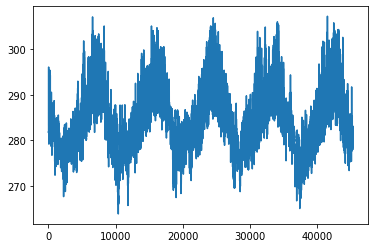

In [92]:
temp['Seattle'].plot()

**8.	Explain what you see when you perform results.summary() on the cities in question 7.**

**Bonus:**

What do GARCH and ARCH Stand for? Break down and explain each piece in the names. Explain the difference between the two. Create a GARCH and ARCH model on the same 5 cities from question 6. Explain and graph the results.

### Data Camp Completion Certificate

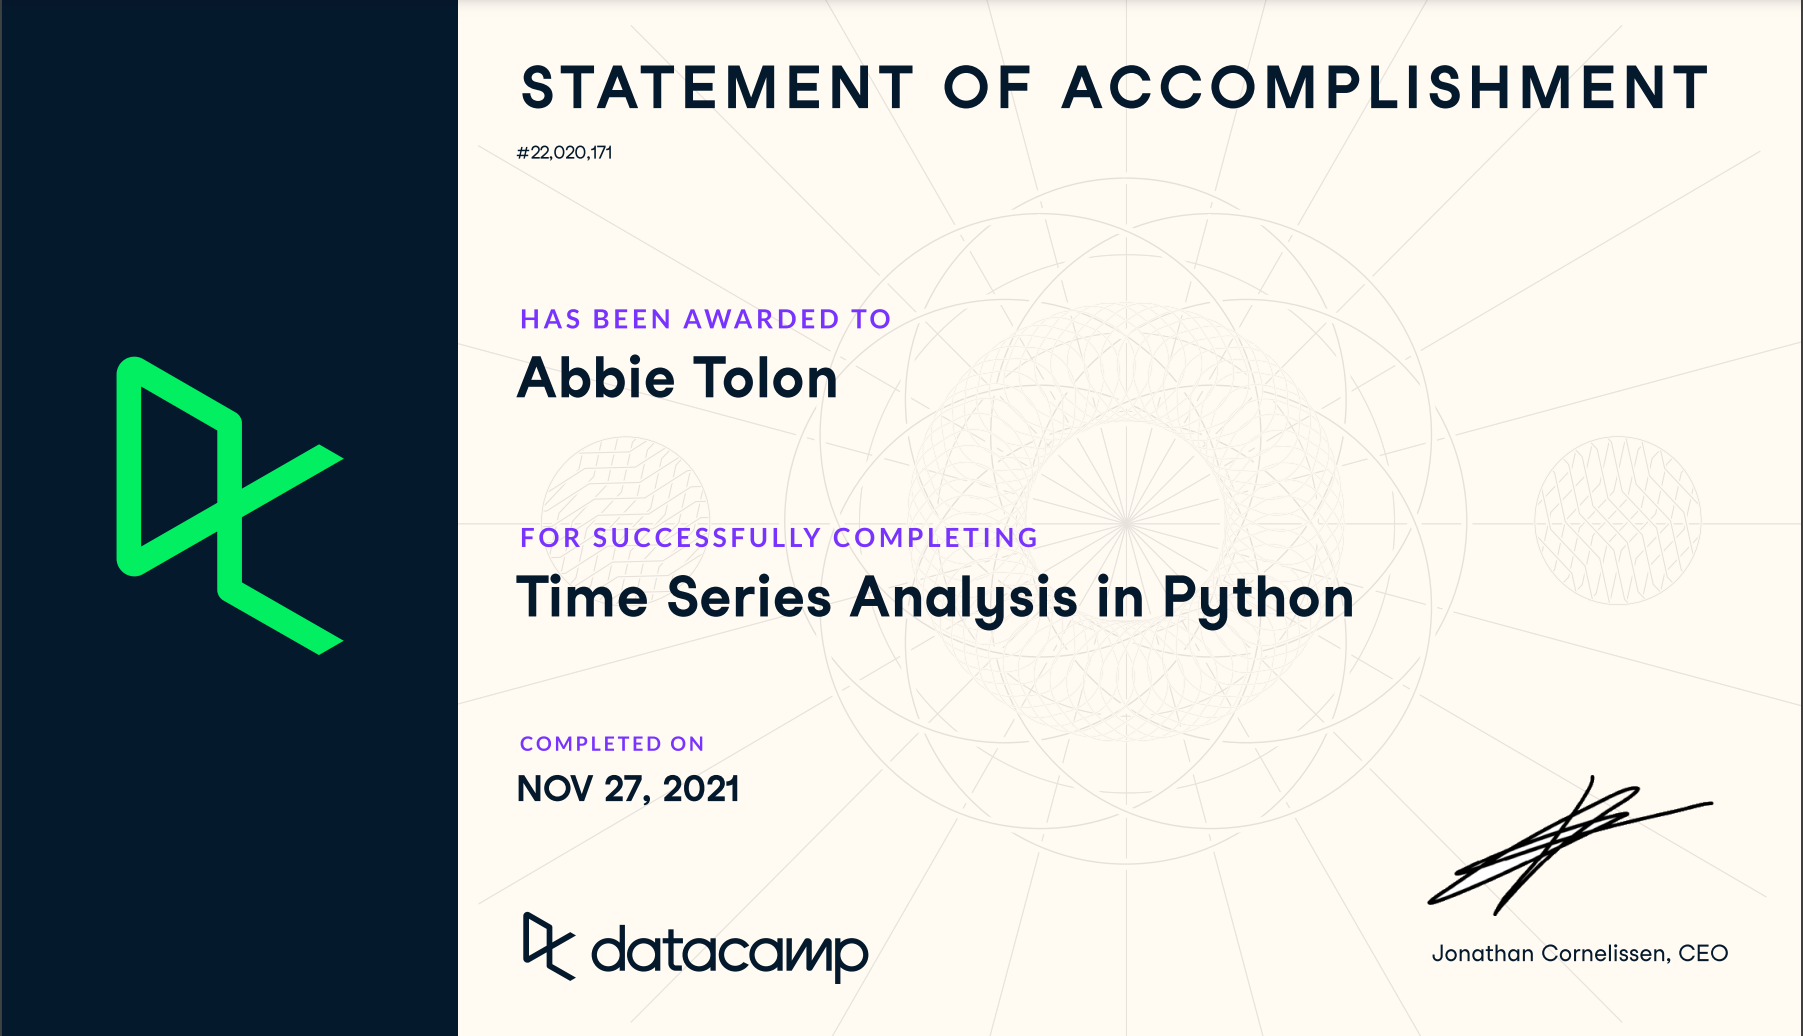